In [46]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import time

In [2]:
f = h5py.File('Data/Test-923/Cs137-1min.h5', 'r')

test_data = pd.DataFrame(f['raw_data'])
test_np = test_data.to_numpy()

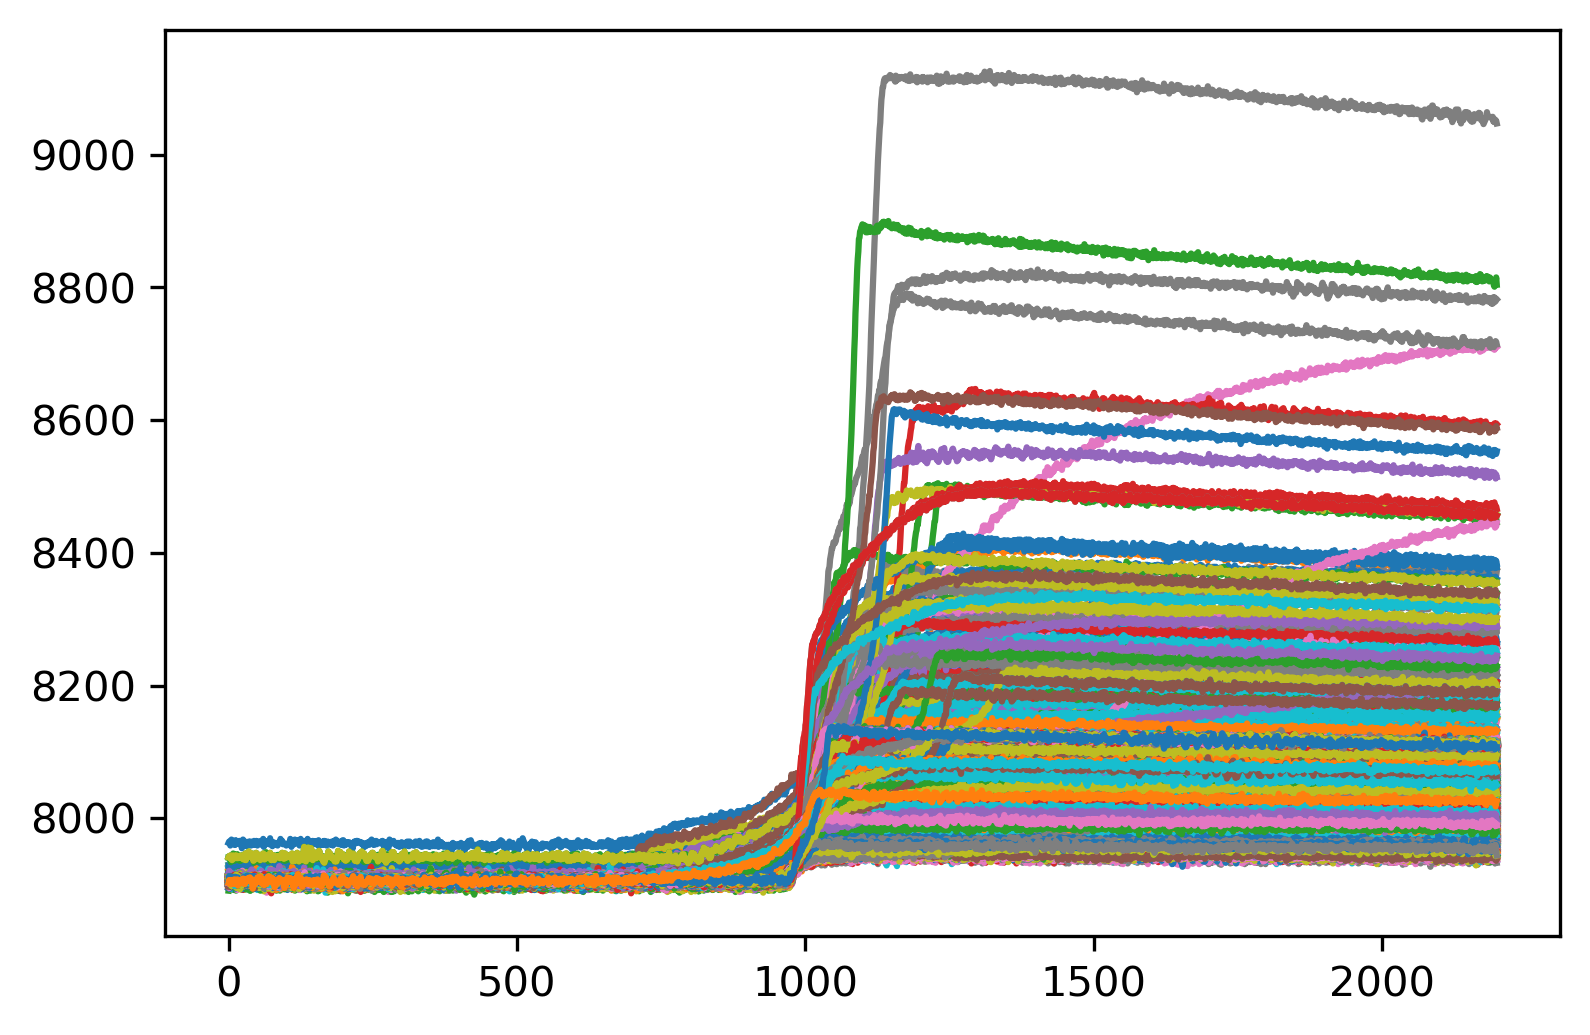

In [3]:
plt.figure(dpi=300)
for i in range(len(test_np)):
    if max(test_np[i]) < 9500:
        plt.plot(test_np[i][:2200])

In [25]:
t = np.arange(2000)

tau_r, tau_f = 20, 2000
shift = 500
test_pulse = np.exp(-(t-shift)/tau_f)*(1-np.exp(-(t-shift)/tau_r))
test_pulse_fix = np.where(test_pulse<0, 0, test_pulse)

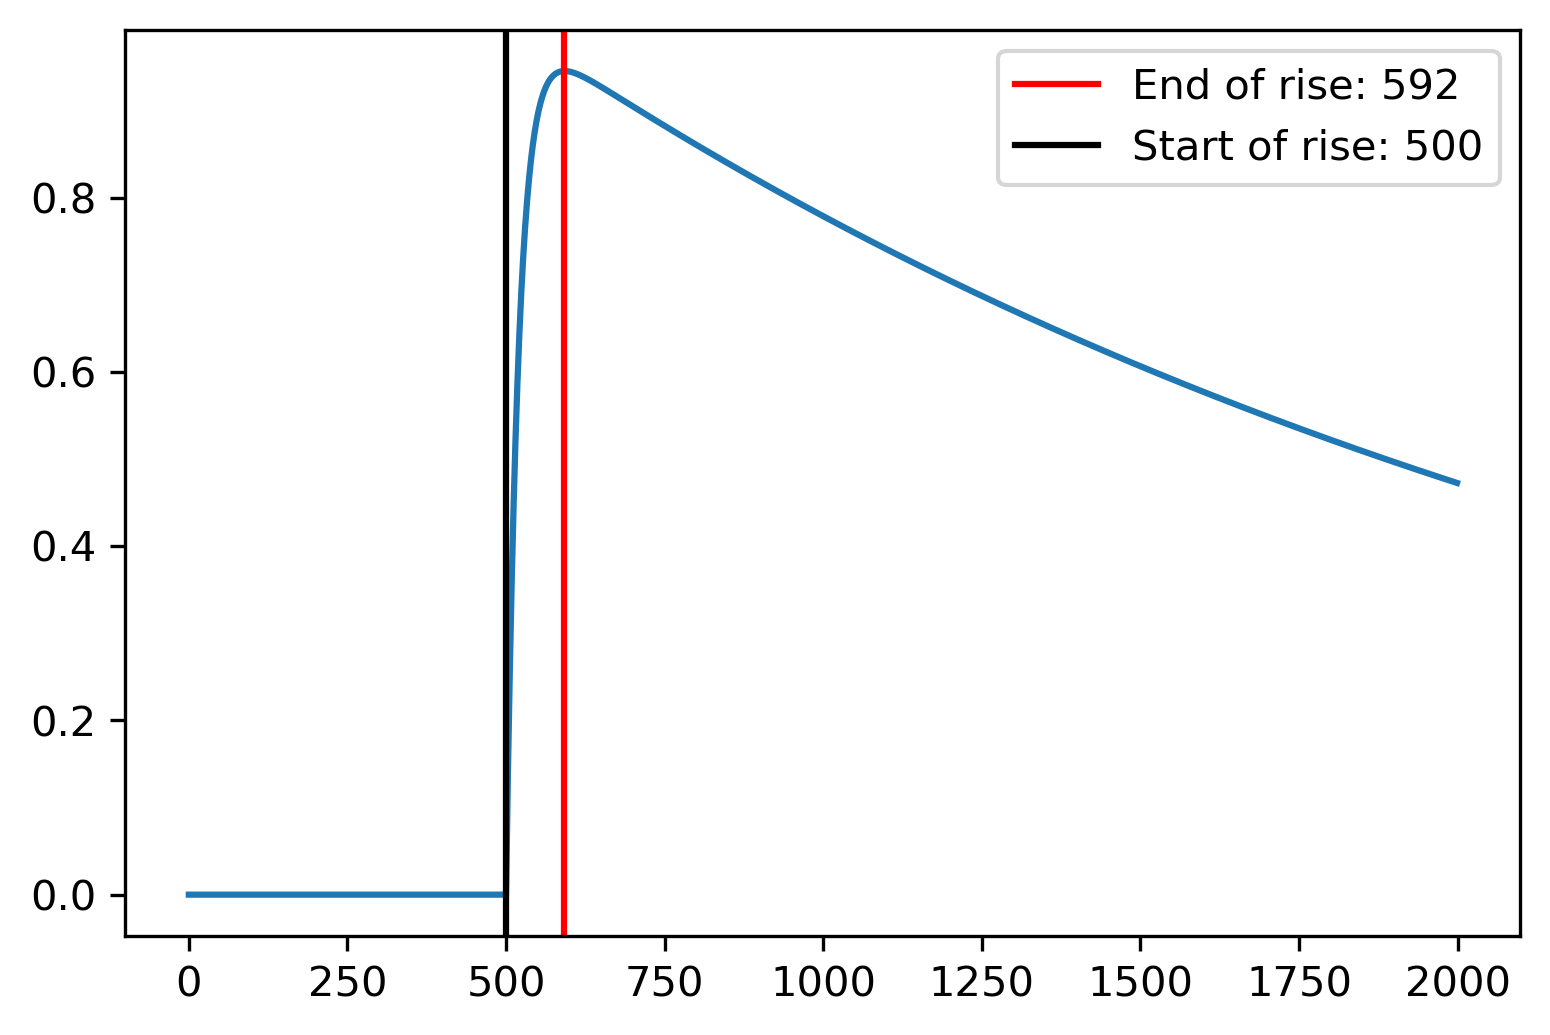

In [26]:
plt.figure(dpi=300)
plt.plot(t, test_pulse_fix)
plt.axvline(np.argmax(test_pulse_fix), c='r', label='End of rise: {}'.format(np.argmax(test_pulse_fix)))
plt.axvline(shift, c='k', label='Start of rise: {}'.format(shift))
plt.legend()
#plt.xlim(0, 5000)
plt.show()

In [29]:
def dkl(signal, i, k, l, w=0):
    if w == 0:
        w = len(signal)//4
    vj = signal[i:i+w]
    vjk = signal[i-k:i+w-k]
    vjl = signal[i-l:i+w-l]
    vjkl = signal[i-k-l:i+w-k-l]
    return vj - vjk - vjl + vjkl

def sn(signal, t, tau, i, k, l, w):
    if t == 0:
        return 0
    else:
        return sn(signal, t-1, tau, i, k, l, w)*(1+1/tau) + dkl(signal, i, k, l, w)[t]
    
def s(signal, i, tau, k, l, w):
    return np.array([sn(signal, j, tau, i, k, l, w) for j in range(w)])

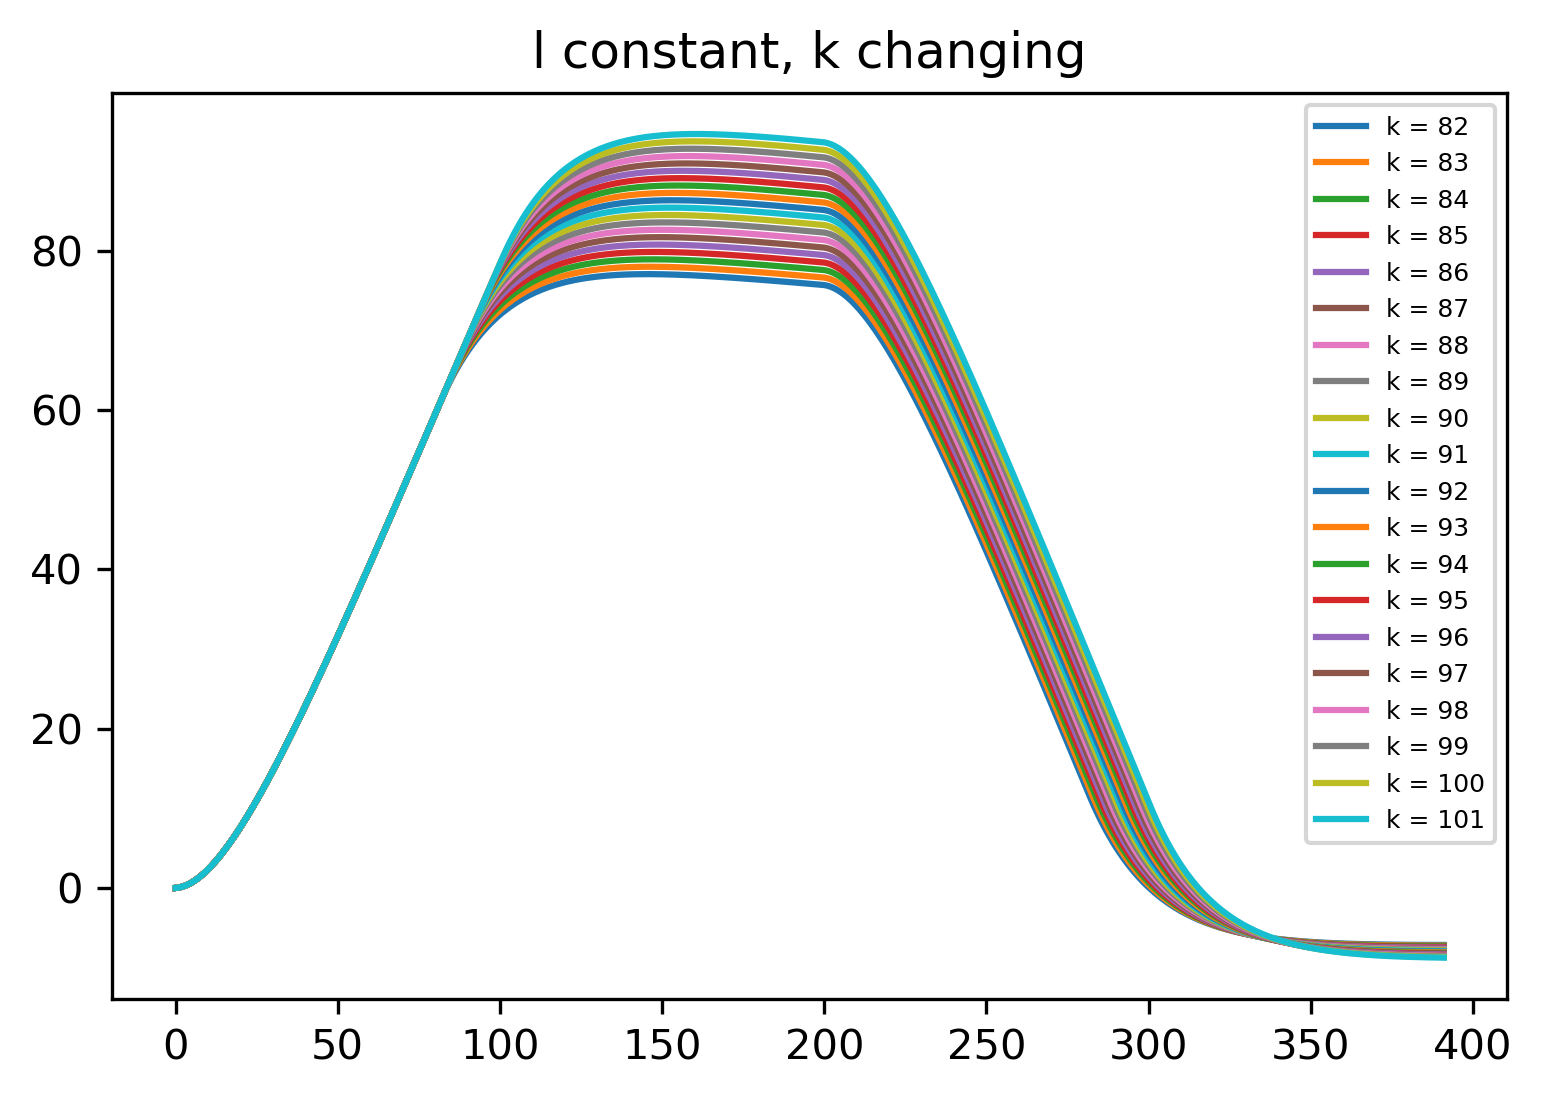

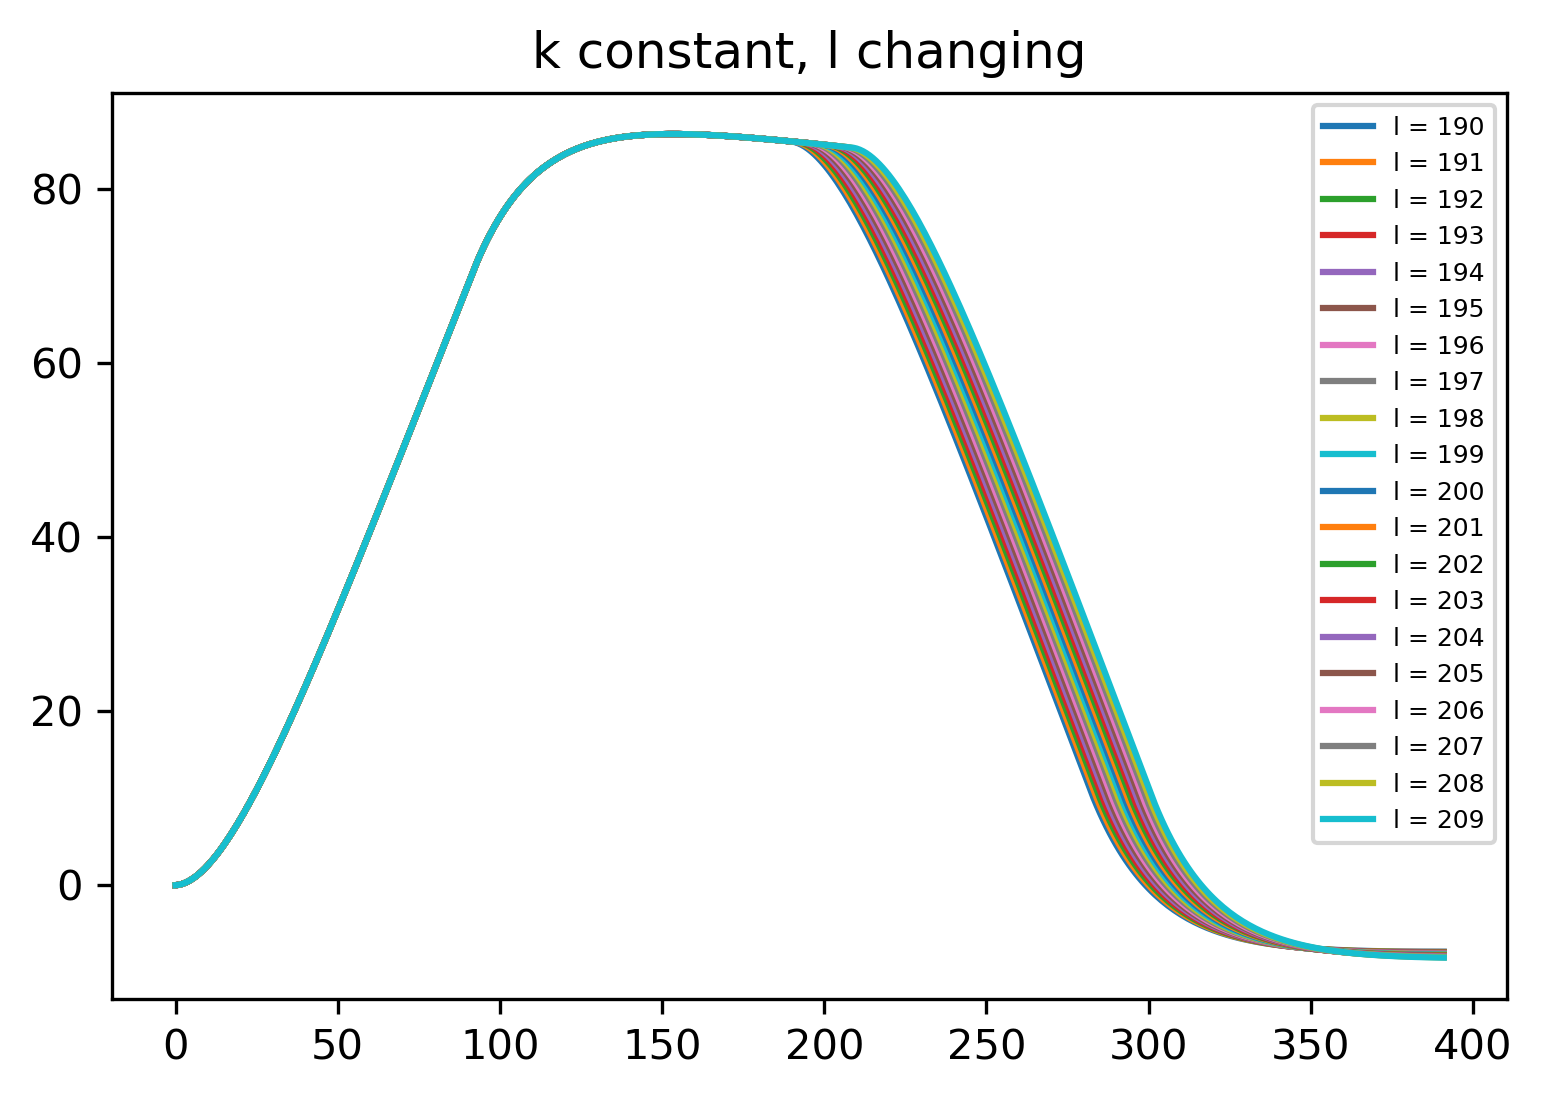

In [28]:
k, l = 92, 200
w = k+l+100
plt.figure(dpi=300)
for k_t in np.arange(k-10, k+10):
    plt.plot(s(test_pulse_fix, shift, tau_f, k_t, l, w), label='k = {}'.format(k_t))
plt.title('l constant, k changing')
plt.legend(fontsize=6)
plt.show()

plt.figure(dpi=300)
for l_t in np.arange(l-10, l+10):
    plt.plot(s(test_pulse_fix, shift, tau_f, k, l_t, w), label='l = {}'.format(l_t))
plt.title('k constant, l changing')
plt.legend(fontsize=6)
plt.show()

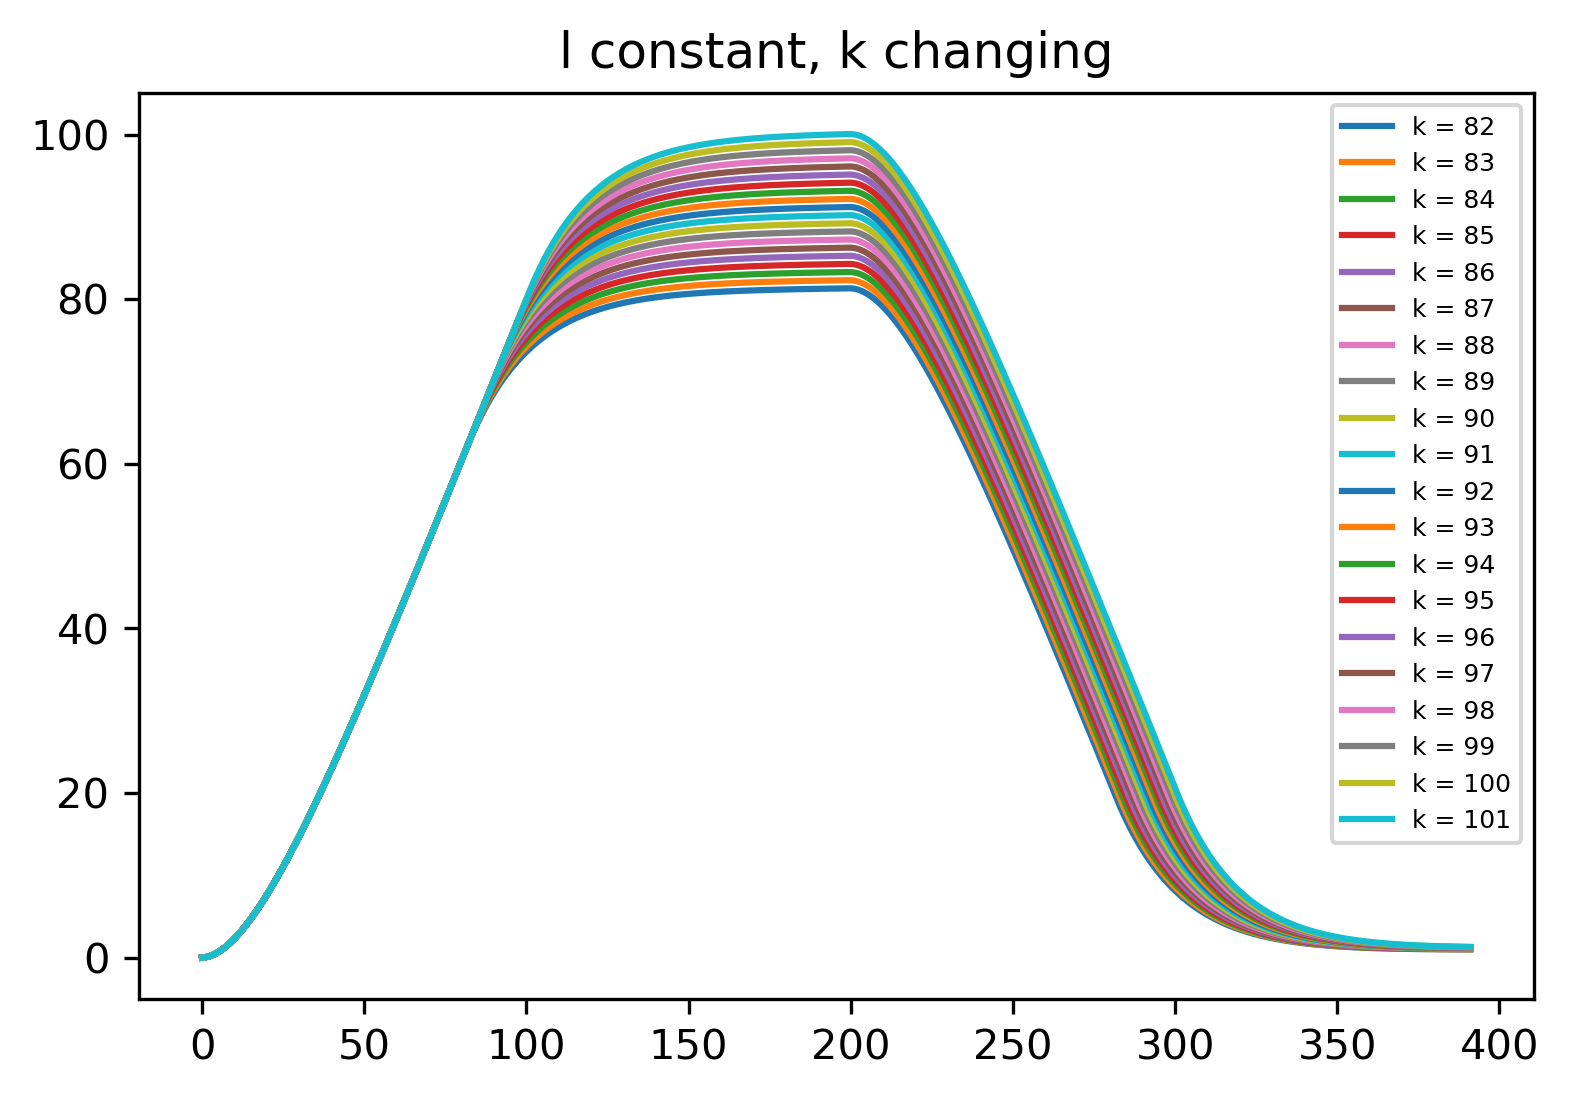

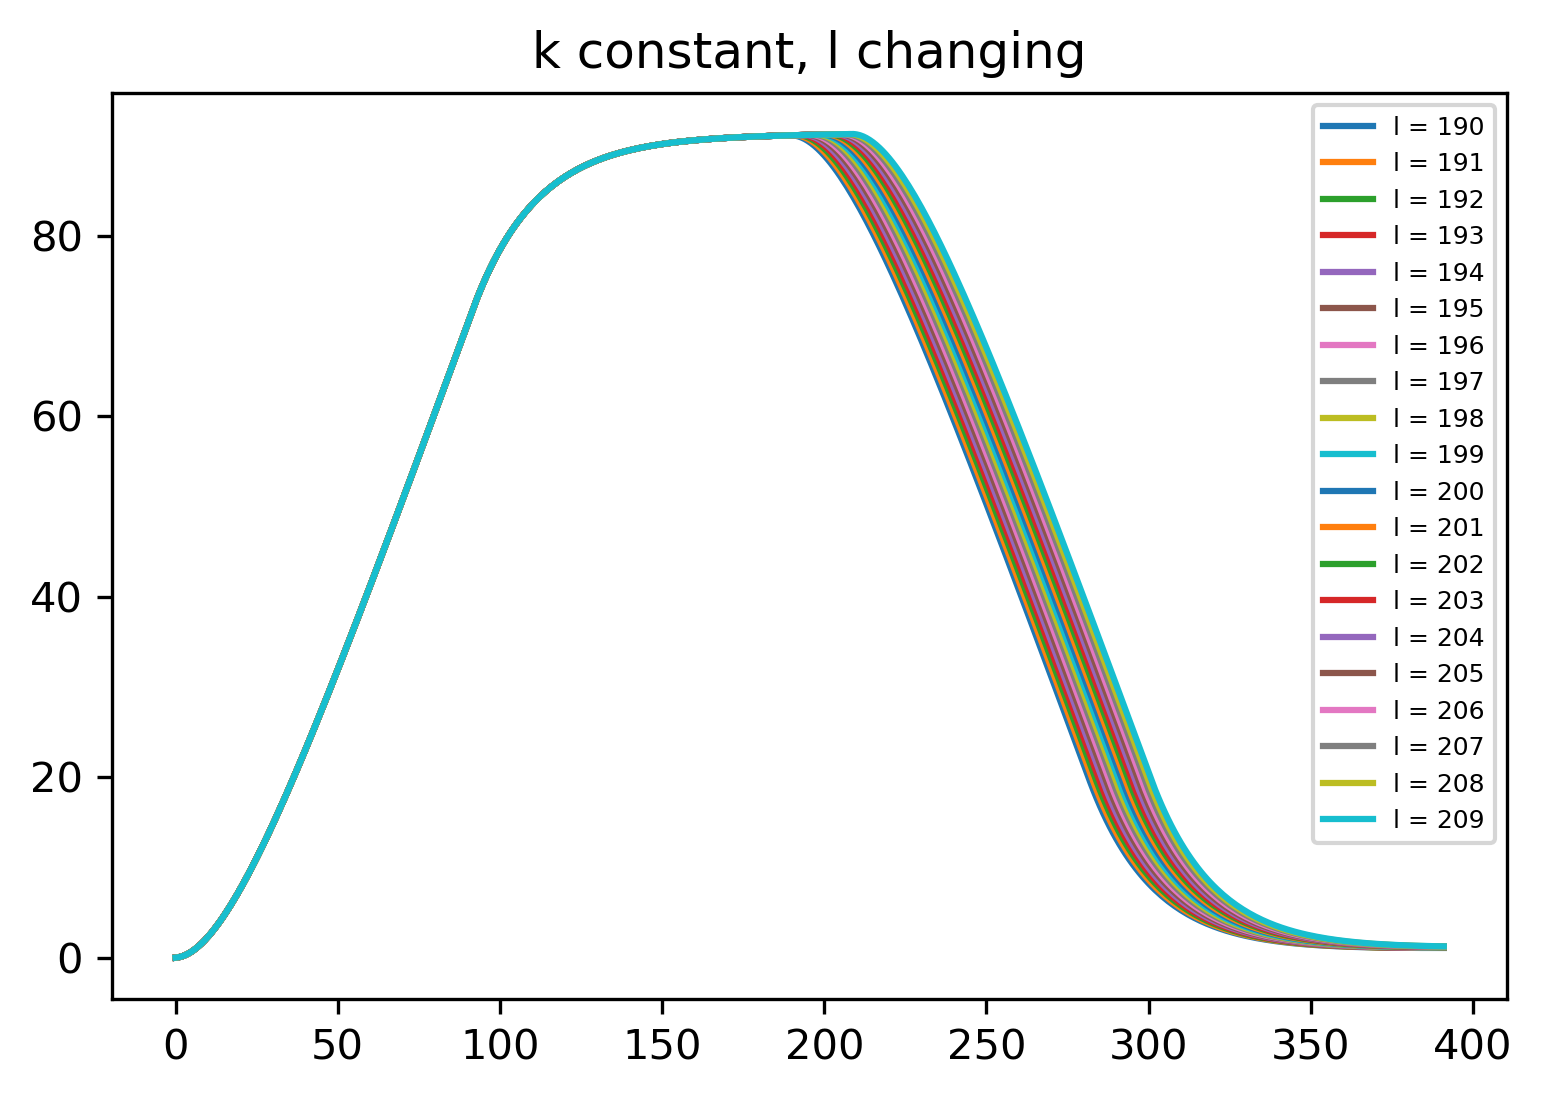

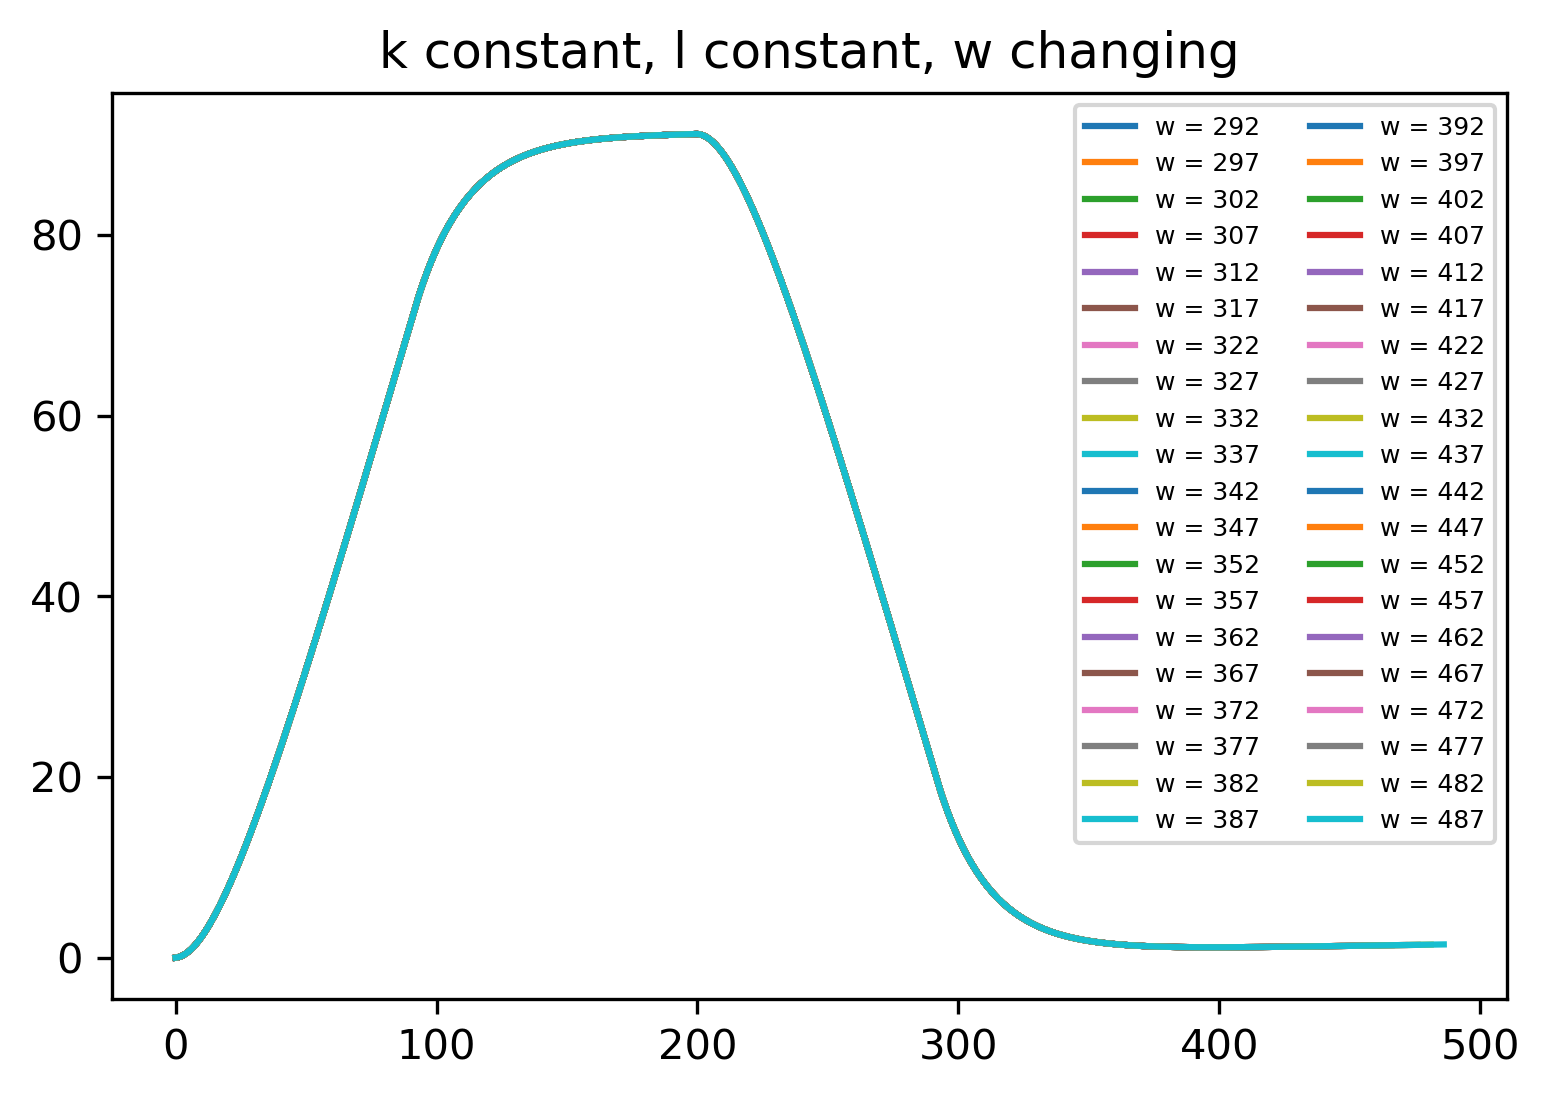

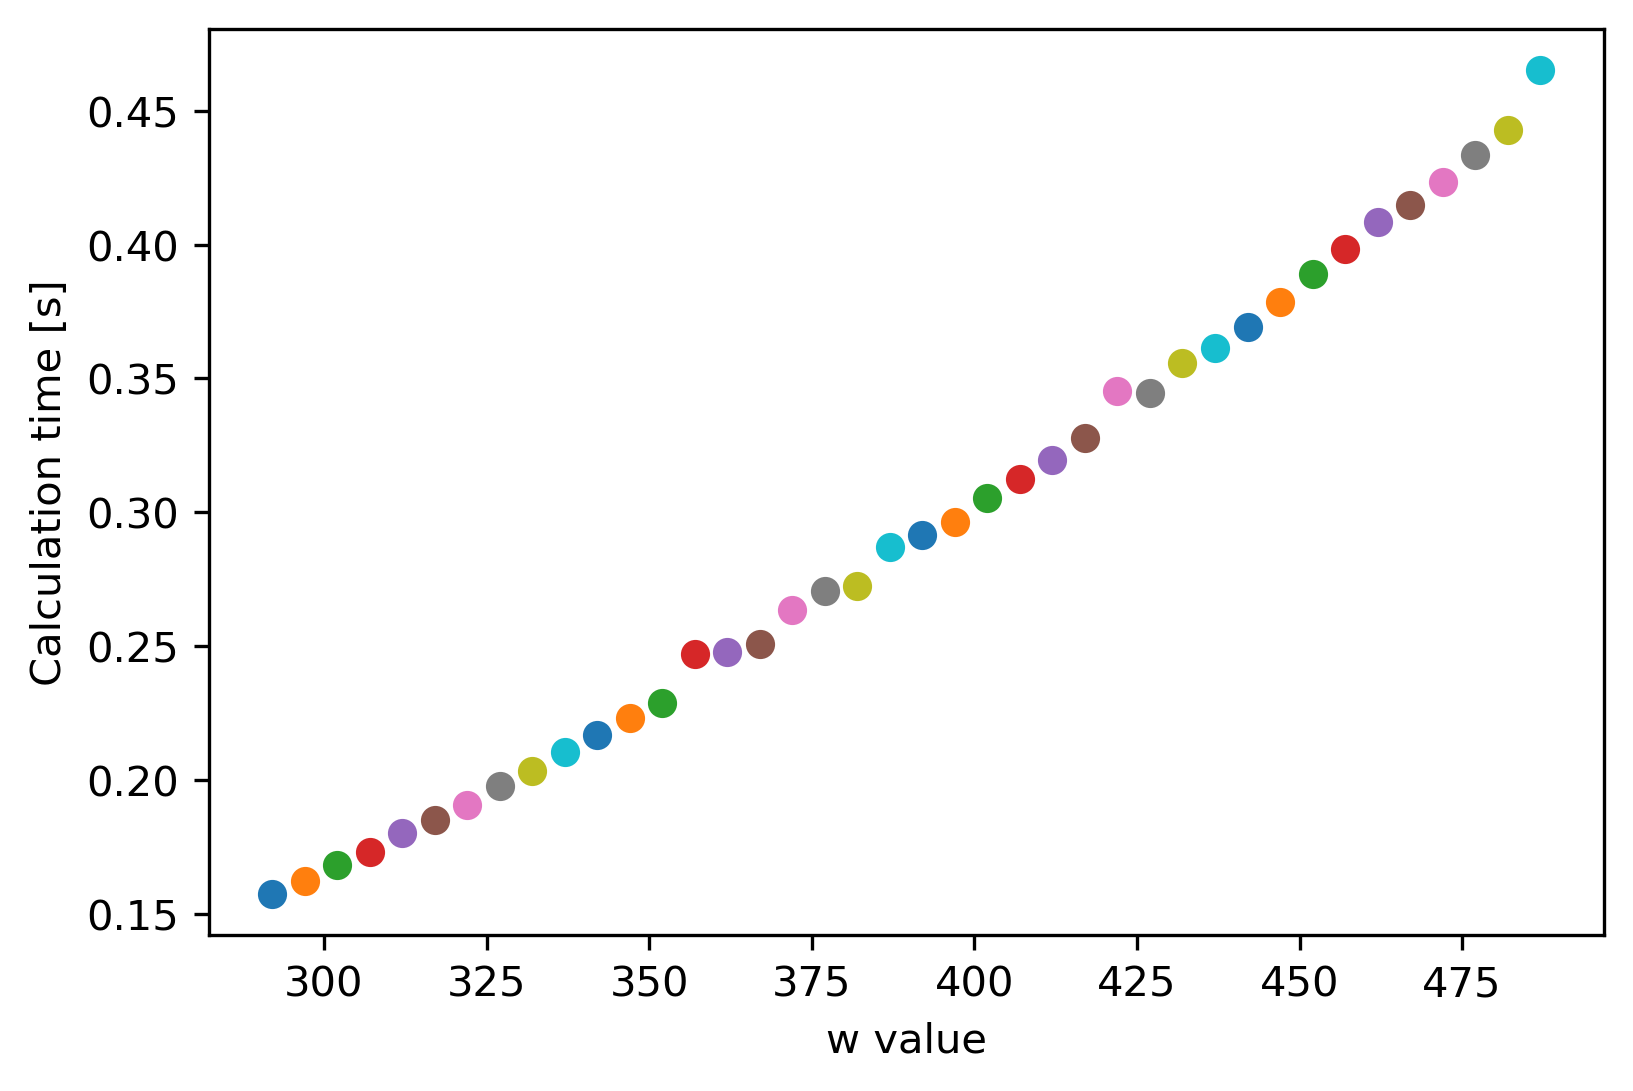

In [47]:
k, l = 92, 200
w = k+l+100
plt.figure(dpi=300)
for k_t in np.arange(k-10, k+10):
    plt.plot(s(test_pulse_fix, shift, tau_f, k_t, l, w), label='k = {}'.format(k_t))
plt.title('l constant, k changing')
plt.legend(fontsize=6)
plt.show()

plt.figure(dpi=300)
for l_t in np.arange(l-10, l+10):
    plt.plot(s(test_pulse_fix, shift, tau_f, k, l_t, w), label='l = {}'.format(l_t))
plt.title('k constant, l changing')
plt.legend(fontsize=6)
plt.show()

plt.figure(dpi=300)
w_time = []
for w_t in np.arange(w-100, w+100)[::5]:
    start_time = time.time()
    s_t = s(test_pulse_fix, shift, tau_f, k, l, w_t)
    w_time.append([w_t, time.time()-start_time])
    plt.plot(s_t, label='w = {}'.format(w_t))
plt.title('k constant, l constant, w changing')
plt.legend(fontsize=6, ncol=2)
plt.show()

plt.figure(dpi=300)
for w_ti in w_time:
    plt.scatter(w_ti[0], w_ti[1])
plt.xlabel('w value')
plt.ylabel('Calculation time [s]')
plt.show()

(800.0, 2000.0)

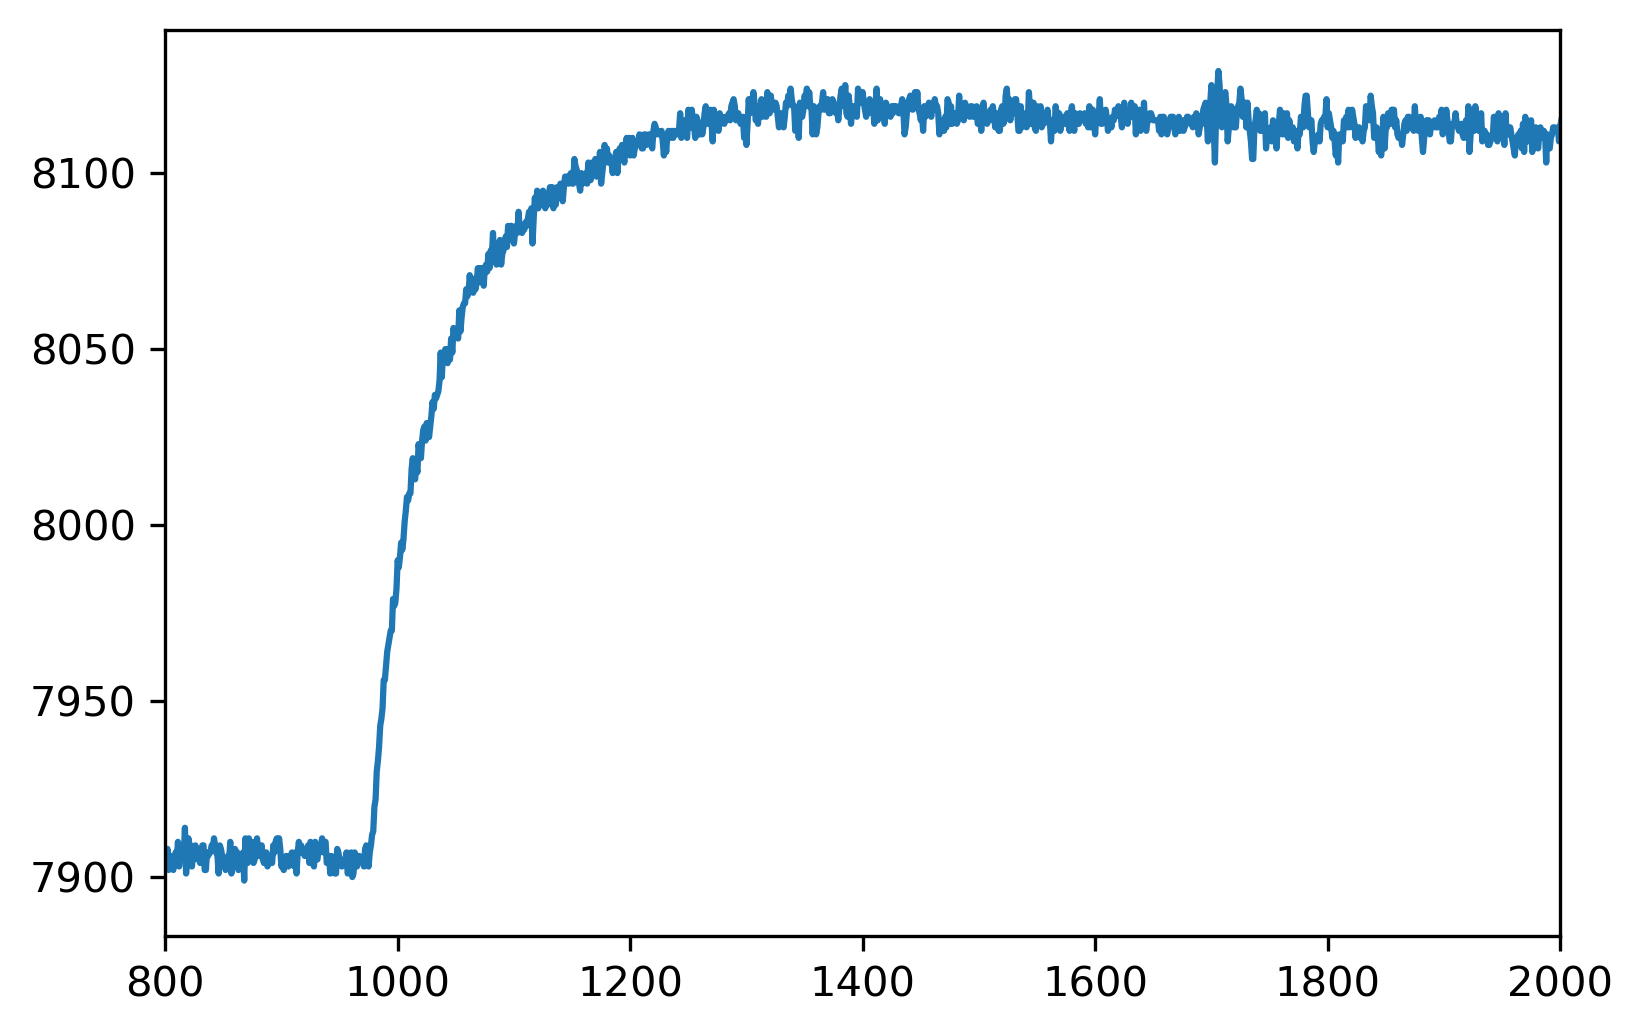

In [59]:
plt.figure(dpi=300)
plt.plot(test_np[1])
plt.xlim(800, 2000)

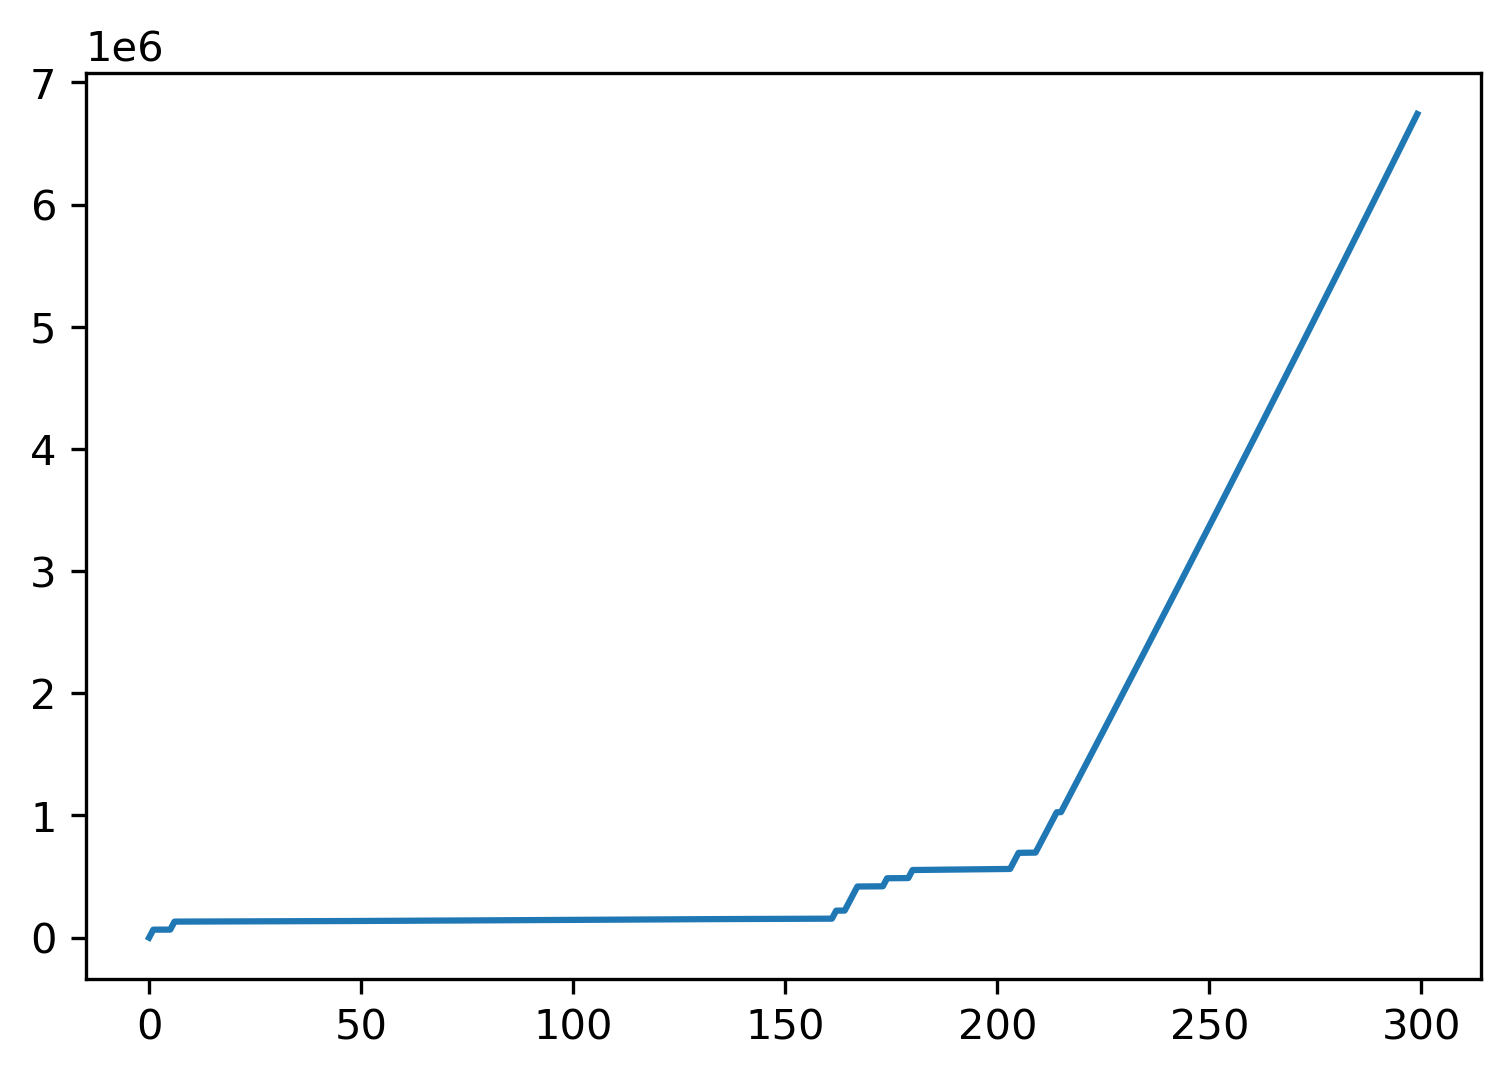

In [56]:
plt.figure(dpi=300)
plt.plot(s(test_np[0], 960, 1500, 75, 200, 300))
plt.show()